# Project Proposal

## Title

<B> Authors </B> Group 14: Sophia Liu, Tejasvi Kathuria, Youjung Kim, Zhekai Zhu

----------

## Introduction

In labor-intensive industries, effective employment is often a topic of discussion, as the production of goods is highly dependent on the productivity of individual workers. Particularly, a common issue in these industries is that the actual productivity of employees does not meet the target productivity, and thus can result in substantial loss in profitability (Imran et al.). In this research, the garment industry was selected to find the relationship between productivity and employees. With the selected data, we propose both an inferential question and a predictive question: How do various external factors relate to the productivity of employees in the garment industry? How can various external factors be used to predict the productivity of employees in the garment industry?

To answer these questions, we want to first consider the variables presented in the data set. The research identified fifteen variables: 

|Variables| Description | 
|:--:|:--:| 
|Date||
|Day||
|Quarter| One of four quarters in a month|
|Department| Associated department of the employee|
|Team_no| Associated team number of the employee|
|No_of_workers| Number of workers in the team for which the employee belongs to|
|No_of_style_change| Number of style changes in the style of a particular product|
|Targeted_productivity| Targeted productivity set by the Authority for each team for each day|
|Smv| Standard Minute Value, it is the allocated time for a task|
|Wip| Work in progress. Includes the number of unfinished items for products|
|Over_time| Represents the amount of overtime by each team in minutes|
|Incentive| Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action|
|Idle_time| The amount of time when the production was interrupted due to several reason|
|Idle_men| The number of workers who were idle due to production interruption|
|Actual_productivity| The actual % of productivity that was delivered by the workers. It ranges from 0-1|


Notably, we want to select actual_productivity as the response variable, and all other variables as potential explanatory variables. We decided that we want to omit the idle_time and idle_men in the data set, as we believe that they are too trivial; this is evident in the dataset where they mostly take a zero value. For other explanatory variables, we will use R to perform further analysis to evaluate how much they influence the response variable.


## Preliminary Results

In [34]:
messages=FALSE
warning=FALSE
#load library
library(broom)
library(latex2exp)
library(tidyverse)
library(repr)
library(digest)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(GGally)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:faraway’:

    happy




>### Load data

In [35]:
#Loading data from the Internet
productivity_df <- read.csv(file = 'https://raw.github.com/JacksonZhuGithub/STAT301_group_project/main/garments_worker_productivity.csv')

#Overview of the dataframe
head(productivity_df)

#number of observations
nrow(productivity_df)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0,0,0,59.0,0.9407254
2,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NA,960,0,0,0,0,8.0,0.8865000
3,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
4,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
5,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0,0,0,56.0,0.8003819
6,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,0,0,0,56.0,0.8001250


[1] 1197

>### Clean and wrangle data

In [36]:
#omiting rows with empty values
productivity_df<-productivity_df%>%
      na.omit()%>%
      as.data.frame()

#Overview of the dataframe
head(productivity_df)

#number of observations
nrow(productivity_df)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0,0,0,59.0,0.9407254
3,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
4,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
5,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0,0,0,56.0,0.8003819
6,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,0,0,0,56.0,0.8001250
8,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795,6900,45,0,0,0,57.5,0.7536835


[1] 691

>### Statistics of Dataset

First, we calculate the means for all continuous variables.

In [37]:
#mean
productivity_df %>%
  select(-c(date,quarter,department,day,team))%>%
  colMeans()%>%
  as.data.frame()%>%
  setNames(c("mean"))

,mean
,<dbl>
targeted_productivity,0.7239797
smv,23.2454124
wip,1190.4659913
over_time,6508.2054993
incentive,44.4833575
idle_time,1.2648336
idle_men,0.6396527
no_of_style_change,0.2604920
no_of_workers,52.4457308


Then, we calculate the variances for all continuous variables.

In [38]:
#data with continuous variable
var_df<-productivity_df %>%
  select(-c(date,quarter,department,day,team))

#empty list
var_list<-c()

#for loop
for (i in 1:10)       
    {var_list[i]=var(var_df[,i])}

#variance data
data.frame(variable=colnames(var_df),
           variance=var_list)

variable,variance
<chr>,<dbl>
targeted_productivity,1.040515e-02
smv,4.867151e+01
wip,3.376241e+06
over_time,8.205392e+06
incentive,7.615718e+02
idle_time,2.793218e+02
idle_men,1.834967e+01
no_of_style_change,2.885673e-01
no_of_workers,8.868654e+01


>### Visualization of data

In our project, the `actual_productivity` is the response variable. The first step is seeing how `actual_productivity` values distributed. We are doing this through the histogram and boxplot.

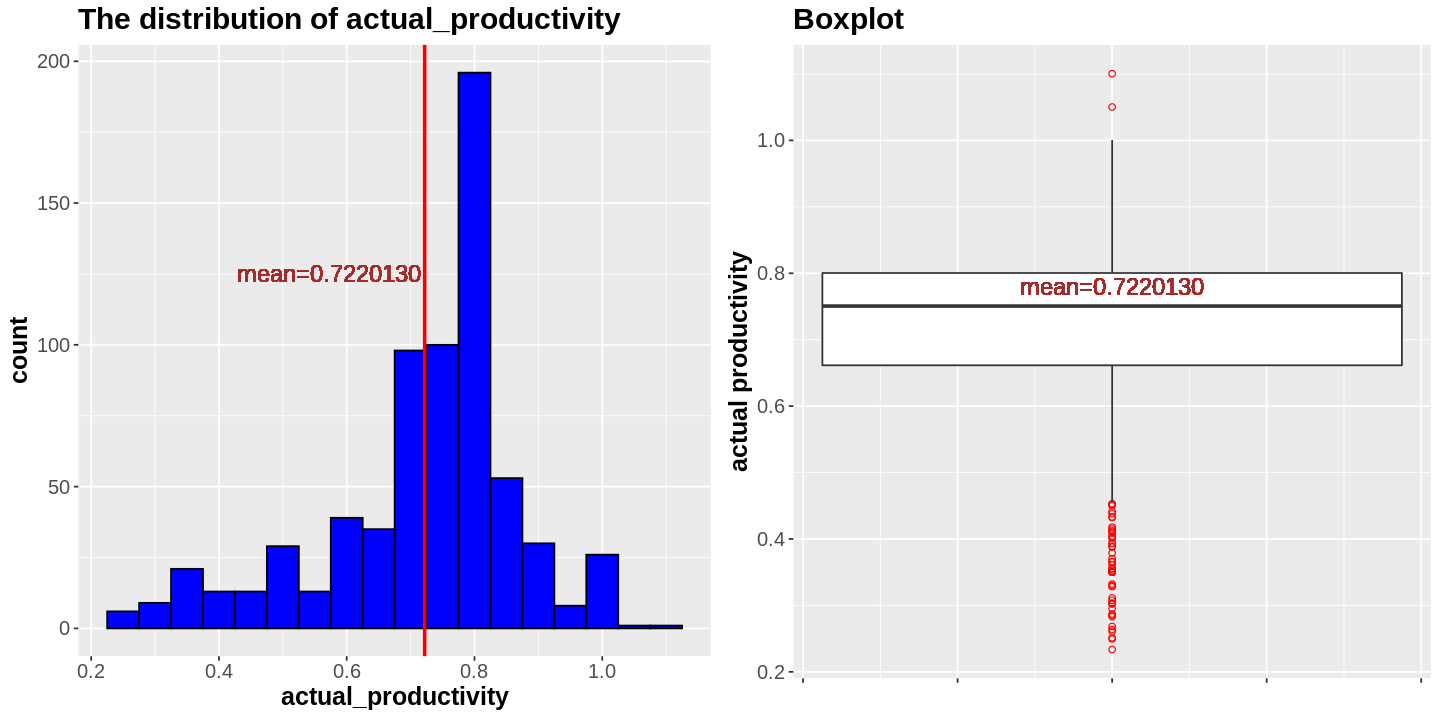

In [47]:
#histogram (response variable)
options(repr.plot.width = 12, repr.plot.height = 6)
actual_productivity_histogram<-productivity_df%>%
            ggplot()+
            geom_histogram(aes(x=actual_productivity),binwidth=0.05,color = "black", fill = "blue")+
            geom_vline(xintercept=mean(productivity_df$actual_productivity), col = "red", size = 1)+ 
            ggtitle("The distribution of actual_productivity")+
            xlab("actual_productivity")+
            ylab("count")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold")
                   )+
            geom_text(aes(x=mean(productivity_df$actual_productivity)-0.15,y=125,
                  label=TeX("mean=0.7220130", output = "character")), 
                  color="brown", size=5,parse = TRUE)

#boxplots (response variable)
actual_productivity_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(y=actual_productivity), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot")+
            ylab("actual productivity")+
            xlab("")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold"),
                  axis.text.x=element_blank()
                   ) +
            geom_text(aes(x=0,y=0.78,
                  label=TeX("mean=0.7220130", output = "character")), 
                  color="brown", size=5,parse = TRUE)

plot_grid(actual_productivity_histogram,actual_productivity_boxplot)

There are categorical variables and continuous variable in the data. The second step is taking a look at the relationships between those categorical variables and response variable `actual_productivity`.

We are exploring the relationships between `actual_productivity` and each **categorical variable** through the boxplots.

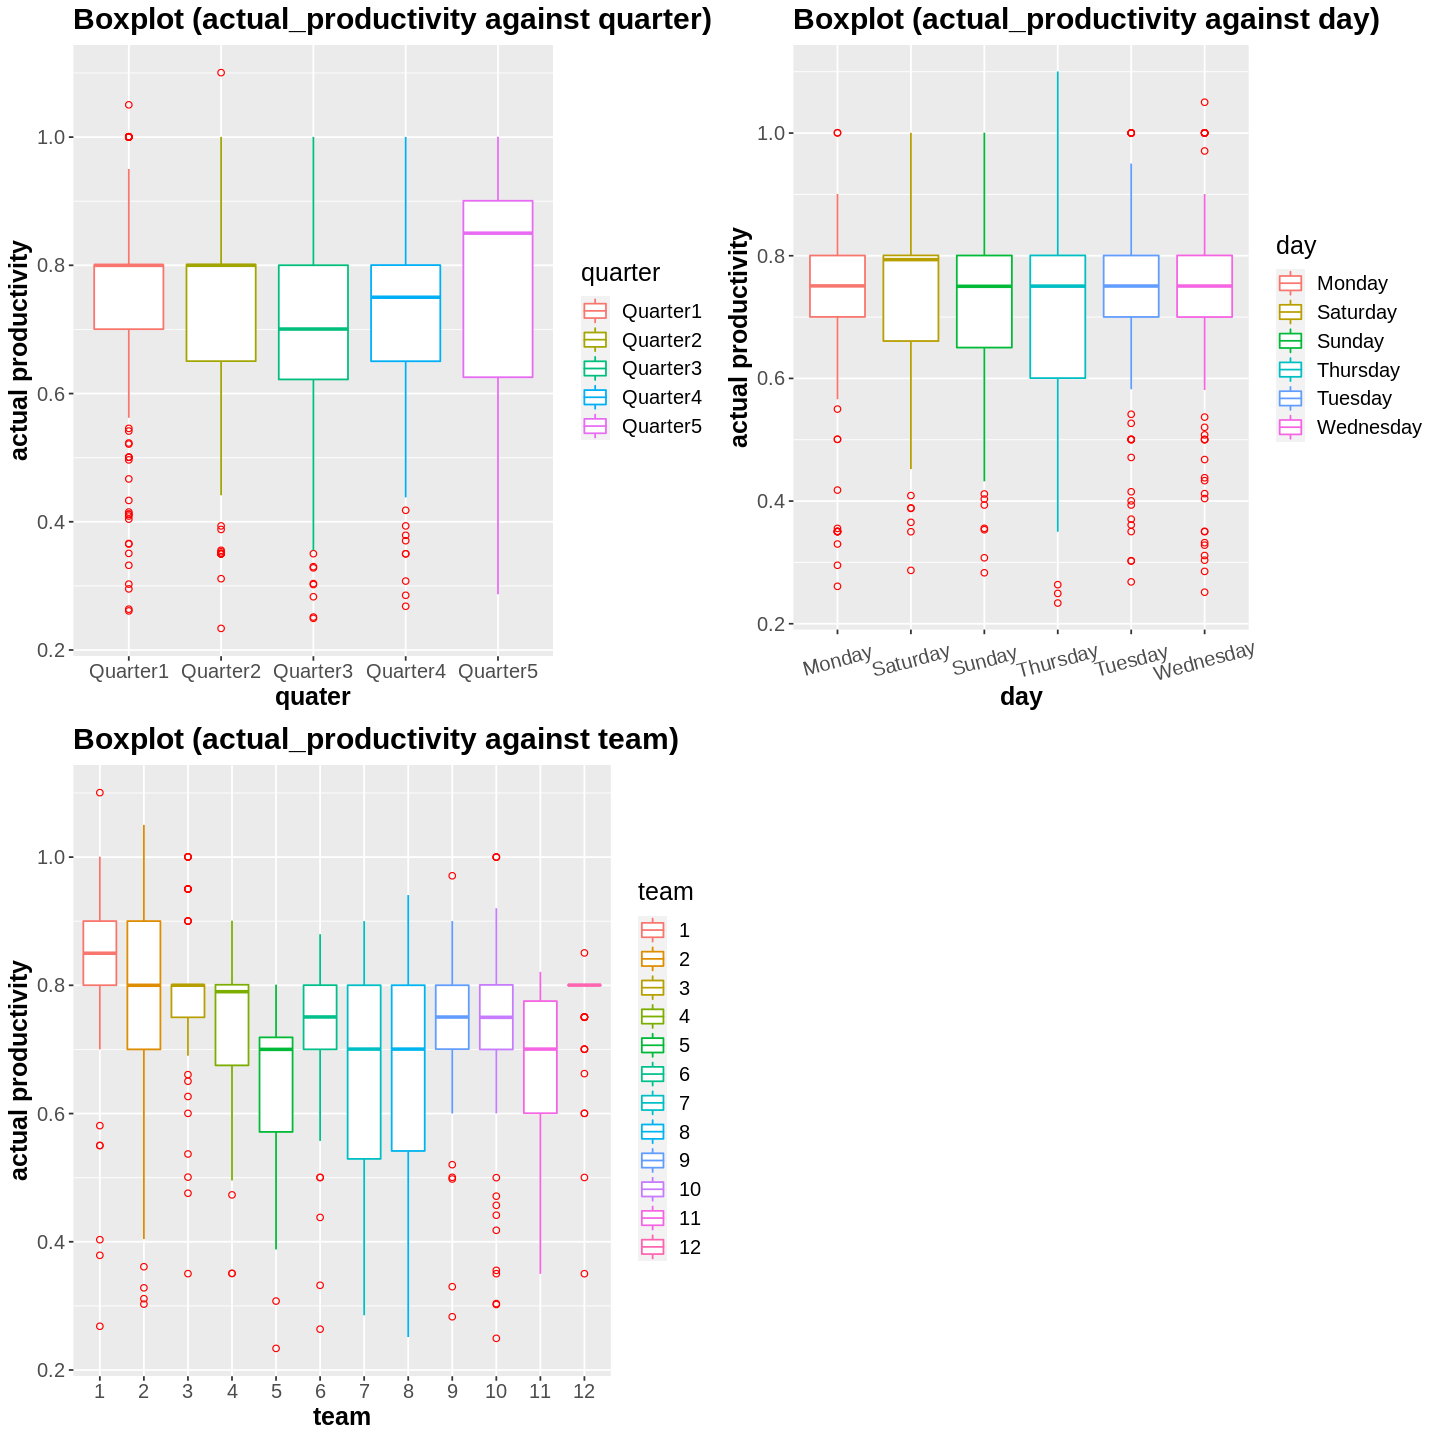

In [40]:
#boxplots (response variable against covariates)
quarter_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(x=quarter,y=actual_productivity,color=quarter), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot (actual_productivity against quarter)")+
            xlab("quater")+
            ylab("actual productivity")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold")
                   ) 

day_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(x=day,y=actual_productivity,color=day), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot (actual_productivity against day)")+
            xlab("day")+
            ylab("actual productivity")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold"),
                  axis.text.x = element_text(angle=15,vjust=+0.5, hjust=+0.5)
                   ) 

team_boxplot<-productivity_df%>%
            ggplot()+
            geom_boxplot(aes(x=as.factor(team),y=actual_productivity,color=as.factor(team)), outlier.colour = "red", outlier.shape = 1)+
            ggtitle("Boxplot (actual_productivity against team)")+
            xlab("team")+
            ylab("actual productivity")+
            labs(color="team")+
            theme(
                  text = element_text(size = 15),
                  plot.title = element_text(face = "bold"),
                  axis.title = element_text(face = "bold")
                   ) 

#plot
options(repr.plot.width = 12, repr.plot.height = 12)
plot_grid(quarter_boxplot,day_boxplot,team_boxplot)

From the boxplots above, it seems that that the distributions of response variable `actual_productivity` varies among different quaters and teams, but we are not sure if the distributions are different for days.

Then, we are exploring (visually) the association between **continuous variables** and the response variable `actual_productivity` in the dataset.

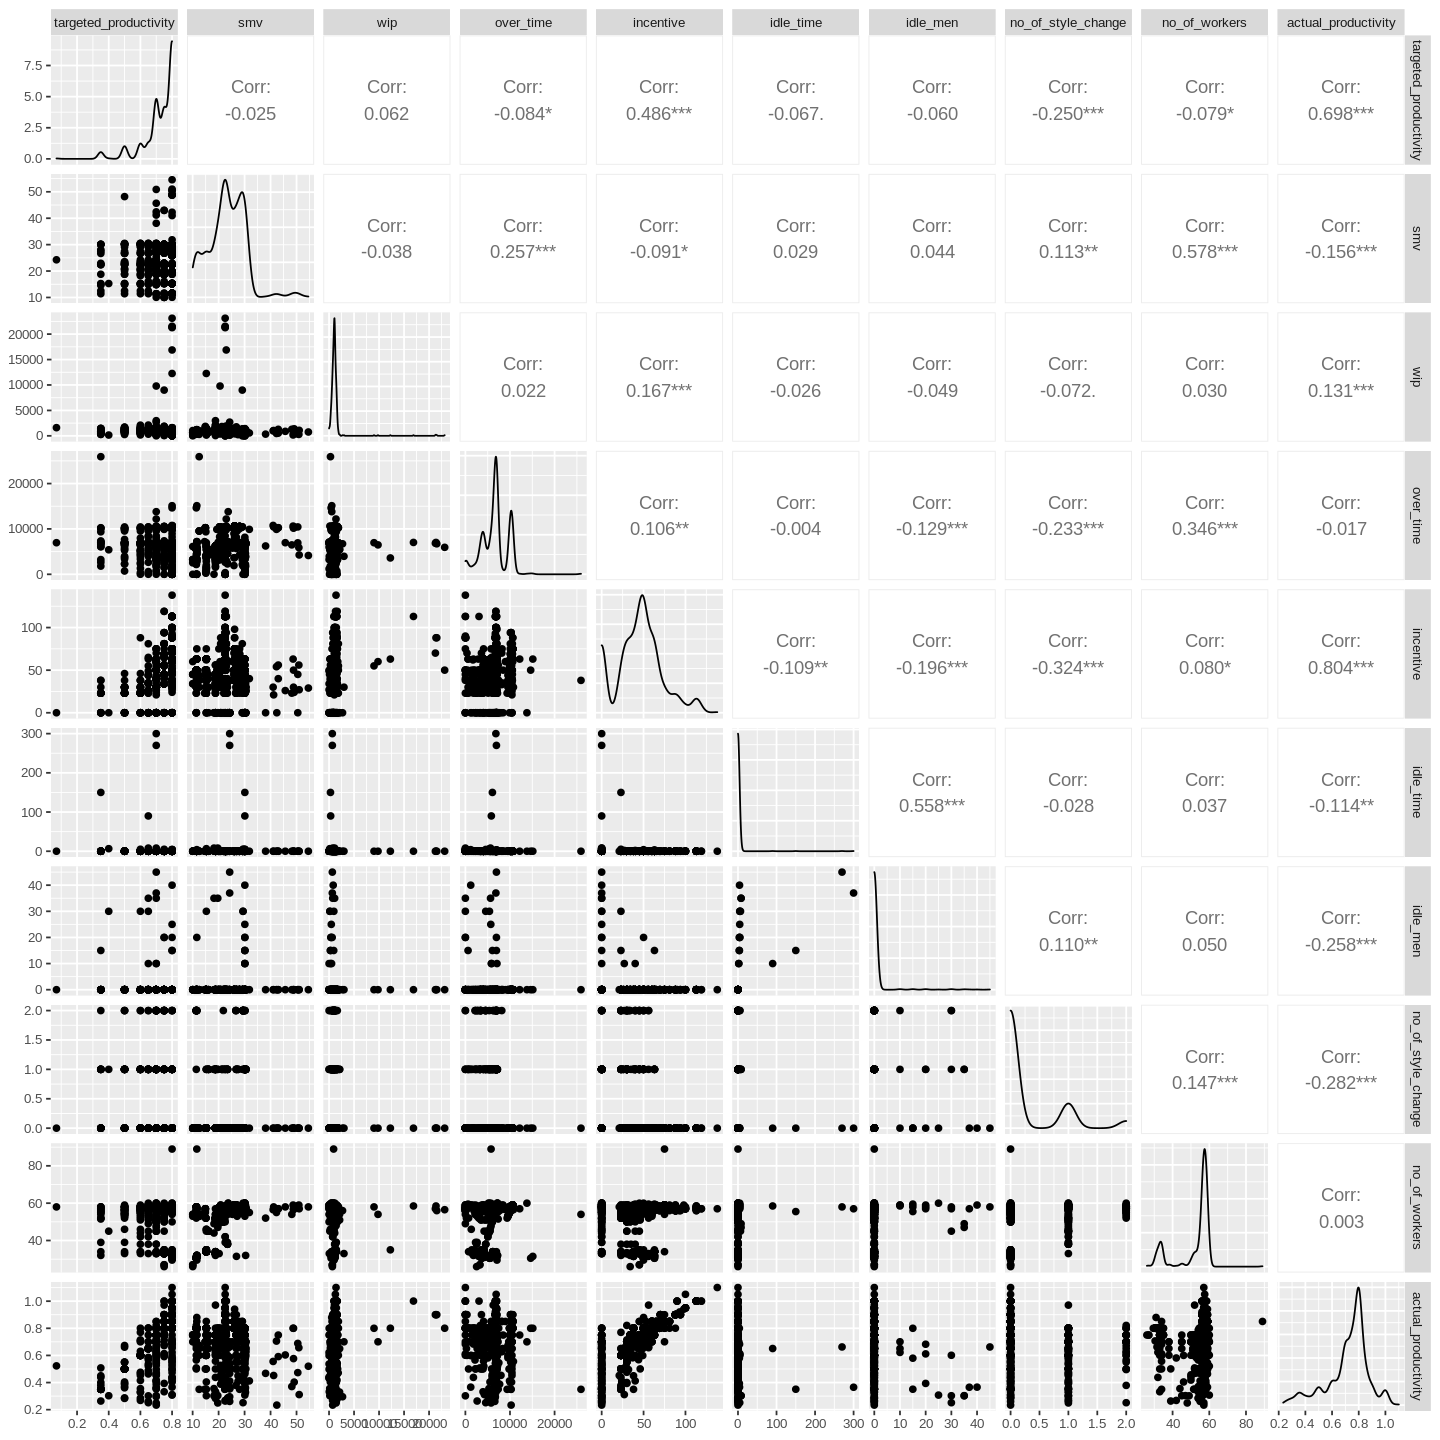

In [41]:
#the association between variables in the dataset.
options(repr.plot.width = 12, repr.plot.height = 12)

coutinuous_variable_pairs_plots <- productivity_df %>%
  select(-c(date,quarter,department,day,team)) %>% 
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

#plot
coutinuous_variable_pairs_plots

From the plot above, we see the correlation coefficients between each variable, most correlation coefficients are very low, but it seems that there exists some high correlations between some variables. 

To make the information above more clear and visualized, we decide to make a heat map. First, we require prior data wrangling of `productivity_df`, and then we create a melted correlation matrix with all pairwise correlations between the input variables of ` productivity_df` and name it `corr_matrix_productivity_df`.

In [42]:
#melted correlation matrix
corr_matrix_productivity_df <- productivity_df %>%
  select(-c(date,quarter,department,day,team)) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "correlation")

#overview of the matrix
head(corr_matrix_productivity_df)

var1,var2,correlation
<chr>,<chr>,<dbl>
targeted_productivity,targeted_productivity,1.00000000
targeted_productivity,smv,-0.02453457
targeted_productivity,wip,0.06205373
targeted_productivity,over_time,-0.08365329
targeted_productivity,incentive,0.48639946
targeted_productivity,idle_time,-0.06686807


Then, we are using the matrix that we just created to plot a $10 \times 10$ (9 continous variables plus 1 response variable) heat map.

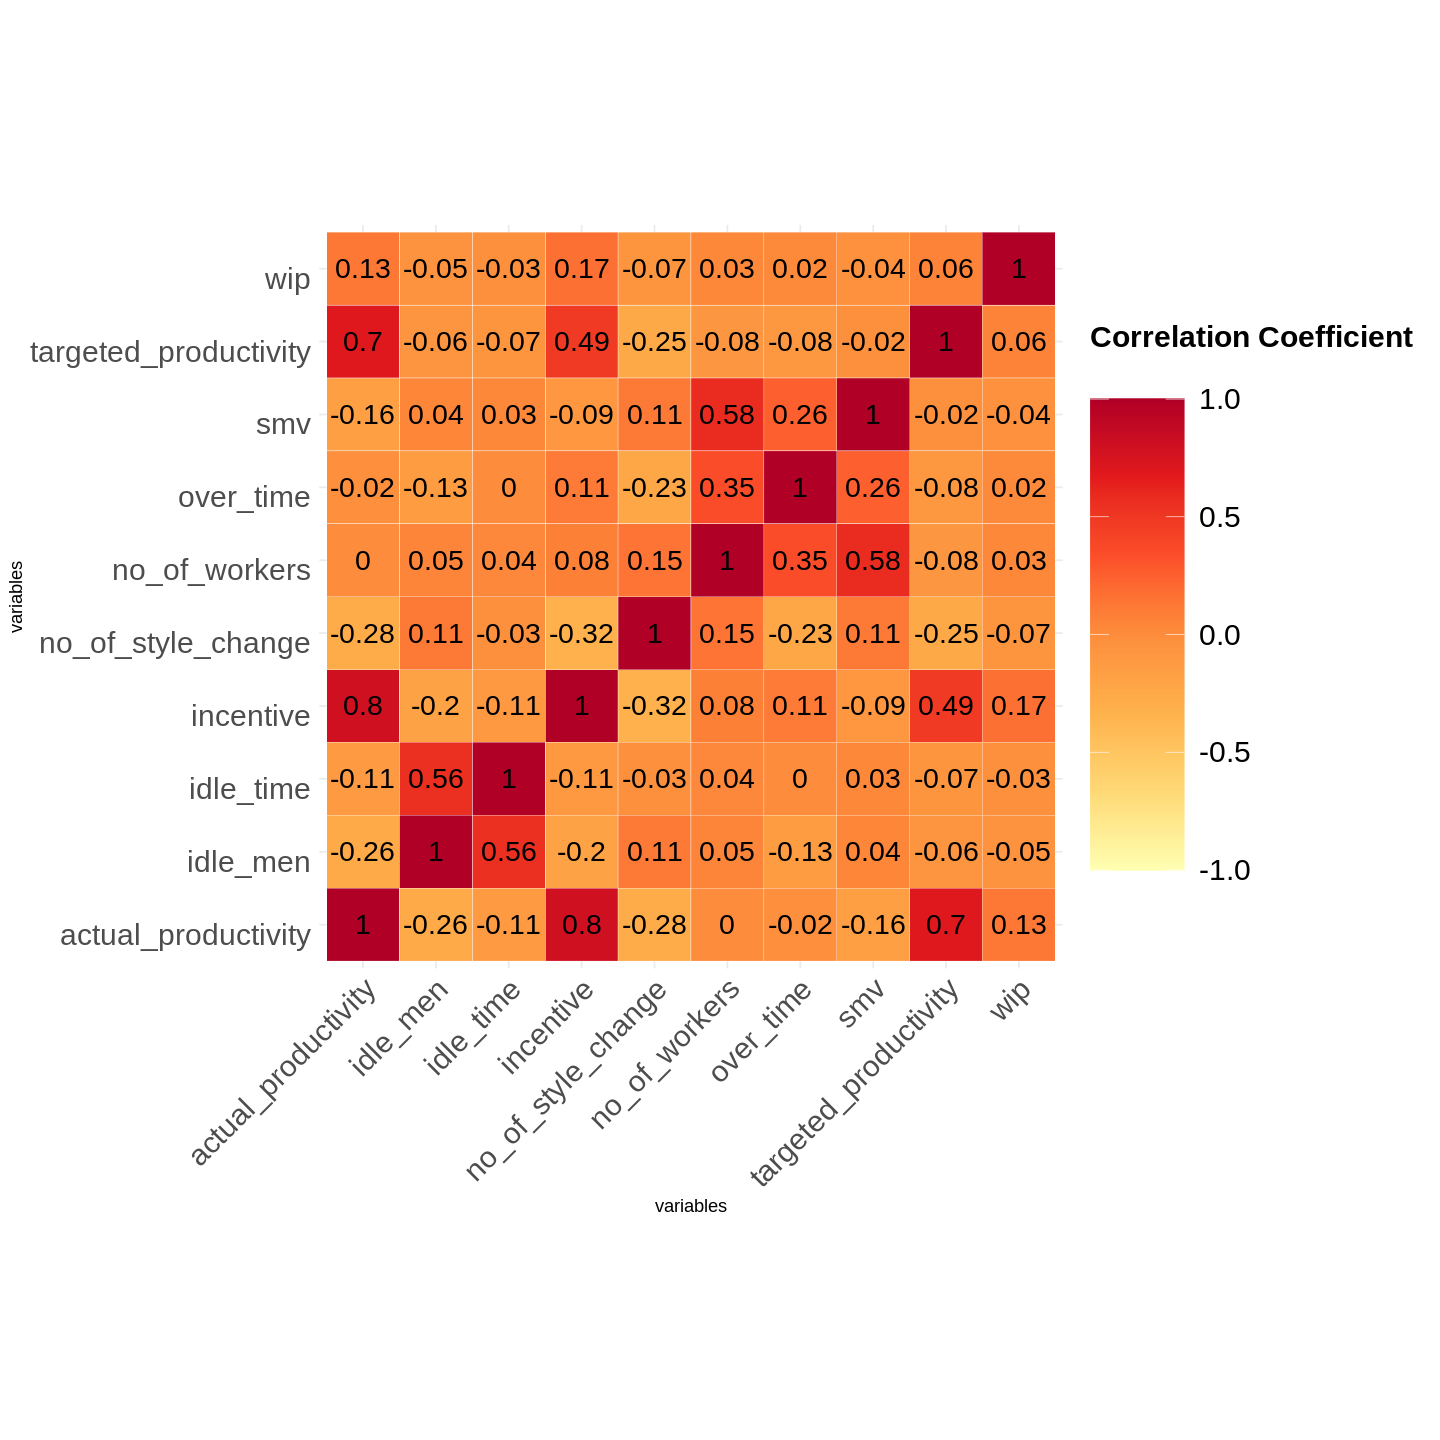

In [45]:
#heat map
plot_corr_matrix_productivity_df <- corr_matrix_productivity_df %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = correlation), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "variables", y = "variables") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(correlation,digits = 2)), color = "black", size = 6)

#plot
plot_corr_matrix_productivity_df

By doing this, we can easily find the correlation coefficients that are consider large from the heatmap, where the correlation coefficient gives the colour scale.

## Methods: Plan

This report utilizes a large sample of employees in the garment manufacturing companies. Using a large sample and proper statistical inference and prediction methods, we can make estimates and come to conclusions with a high degree of credibility.

While exploring the association between explanatory variables in our EDA, we came across a few variables with a high correlation coefficient. We plan to take these into account while selecting the variables for our model to avoid any statistical consequences that can be caused by multicollinearity. We will also use regression diagnostics to evaluate other model assumptions like heteroscedasticity by comparing the fitted values to the residuals, and normality by a Q-Q plot and histogram of residuals.

For the generative model, we will first split the data into training and testing sets then estimate and evaluate the coefficients to select the best model by using adjusted $R^2$ to compare the models and $F$-test to evaluate the sets of variables. Further, for our predictive model, we will split the data in a similar way and use the Cp and BIC to compare and approximate the test MSE of out-of-sample. We intend to select the suitable explanatory variables using the forward selection algorithm to select a smaller subset of variables that better explain the variation in our response since not all the terms in this regression are statistically significant.

Our findings could be of use to garment manufacturing companies in increasing productivity and adjusting employee’s working hours as desired. Further research could incorporate these findings and study other factors related to working environments.


----------

## References

Data: https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees

[1] Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). Deep Neural Network Approach for Predicting the Productivity of Garment Employees. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT). https://doi.org/10.1109/CoDIT.2019.8820486

[2] Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of the Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. https://doi.org/10.1504/ijbidm.2021.118183